In [19]:
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
from nltk import tokenize

# Question 1

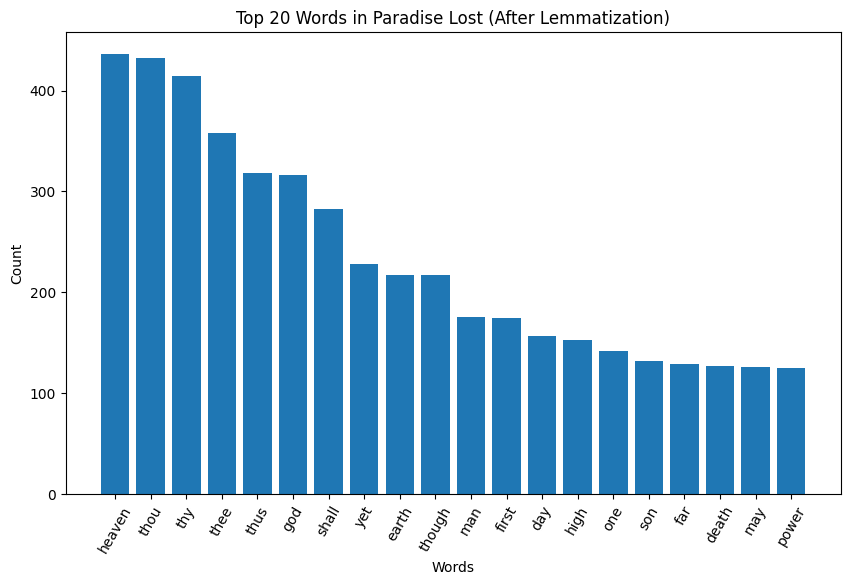

Top 20 Words: [('heaven', 436), ('thou', 432), ('thy', 414), ('thee', 358), ('thus', 318), ('god', 316), ('shall', 283), ('yet', 228), ('earth', 217), ('though', 217), ('man', 176), ('first', 175), ('day', 157), ('high', 153), ('one', 142), ('son', 132), ('far', 129), ('death', 127), ('may', 126), ('power', 125)]


In [2]:
def process_paradise_lost():
    words = gutenberg.words('milton-paradise.txt')

    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    
    processed_words = [
        lemmatizer.lemmatize(word.lower())
        for word in words
        if word.lower() not in stop_words
        and word.isalpha() 
        and len(word) > 2 
    ]

    word_counts = Counter(processed_words)

    top_words = word_counts.most_common(20)
    word_list = []
    count_list = []

    for word, count in top_words:
        word_list.append(word)
        count_list.append(count)
    plt.figure(figsize=(10, 6))
    plt.bar(word_list, count_list)
    plt.xticks(rotation=60)
    plt.title('Top 20 Words in Paradise Lost (After Lemmatization)')
    plt.ylabel('Count')
    plt.xlabel('Words')
    plt.show()

    return top_words

top_words = process_paradise_lost()
print("Top 20 Words:", top_words)

Lemmatization ensures that the derived forms of a word are mapped to their meaningful base root, making the analysis more accurate. Stemming might over-simplify by removing word endings without considering context.

In [14]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /Users/alan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Question 2

In [28]:
sentences = [" ".join(sent).strip() for sent in gutenberg.sents('milton-paradise.txt')]

sid = SentimentIntensityAnalyzer()

positive_sentences = []
negative_sentences = []
neutral_sentences = []

for x in sentences:
    scores = sid.polarity_scores(x)
    if scores['compound'] > 0.5: 
        positive_sentences.append((x, scores['compound']))
    elif scores['compound'] < -0.5: 
        negative_sentences.append((x, scores['compound']))
    else:
        neutral_sentences.append((x, scores['neu']))

positive_sentences = sorted(positive_sentences, key=lambda x: x[1], reverse=True)
negative_sentences = sorted(negative_sentences, key=lambda x: x[1])
neutral_sentences = sorted(neutral_sentences, key=lambda x: x[1], reverse=True)

top_positive = positive_sentences[:5]
top_negative = negative_sentences[:5]
top_neutral = neutral_sentences[:5]

print("Top 5 Positive Sentences:")
for sentence, score in top_positive:
    print(f"{sentence} (Compound: {score})")

print("\nTop 5 Negative Sentences:")
for sentence, score in top_negative:
    print(f"{sentence} (Compound: {score})")

print("\nTop 5 Neutral Sentences:")
for sentence, score in top_neutral:
    print(f"{sentence} (Neutral: {score})")



Top 5 Positive Sentences:
Round he surveys ( and well might , where he stood So high above the circling canopy Of night ' s extended shade ,) from eastern point Of Libra to the fleecy star that bears Andromeda far off Atlantick seas Beyond the horizon ; then from pole to pole He views in breadth , and without longer pause Down right into the world ' s first region throws His flight precipitant , and winds with ease Through the pure marble air his oblique way Amongst innumerable stars , that shone Stars distant , but nigh hand seemed other worlds ; Or other worlds they seemed , or happy isles , Like those Hesperian gardens famed of old , Fortunate fields , and groves , and flowery vales , Thrice happy isles ; but who dwelt happy there He staid not to inquire : Above them all The golden sun , in splendour likest Heaven , Allured his eye ; thither his course he bends Through the calm firmament , ( but up or down , By center , or eccentrick , hard to tell , Or longitude ,) where the great 

The book's old language, and poetic style make accurate sentiment detection difficult. Positive sentences, such as descriptions of Eden, are rated highly due to words like "happy" and "light," but the tool overlooks the broader context. Negative sentences, often about despair or evil, are scored low, but the nuance and reflective tone of the text are missed. Neutral sentences seem improperly classified, as some are clearly emotional or descriptive but lack explicit markers the tool recognizes. Overall, VADER's reliance on modern, straightforward language limits its accuracy for nuanced, literary texts like this one.

# Extra Credit

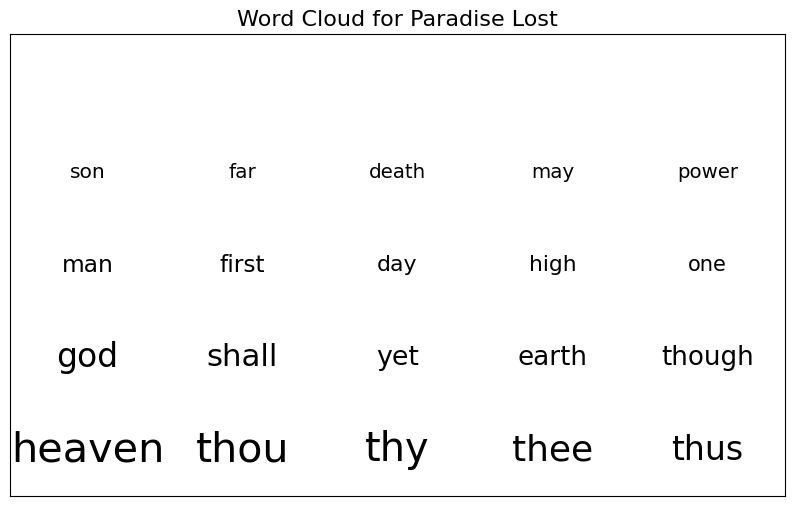

In [41]:
top_words = [
    ('heaven', 436), ('thou', 432), ('thy', 414), ('thee', 358), 
    ('thus', 318), ('god', 316), ('shall', 283), ('yet', 228), 
    ('earth', 217), ('though', 217), ('man', 176), ('first', 175), 
    ('day', 157), ('high', 153), ('one', 142), ('son', 132), 
    ('far', 129), ('death', 127), ('may', 126), ('power', 125)
]

def text_size(count):
    return 8 + count / 200 * 10

plt.figure(figsize=(10, 6))

for i, (word, count) in enumerate(top_words):
    plt.text(
        i % 5 * 20 + 10,  
        i // 5 * 20 + 10, 
        word,
        ha='center',
        va='center',
        size=text_size(count)
    )

plt.axis([0, 100, 0, 100]) 
plt.xticks([]) 
plt.yticks([]) 
plt.title("Word Cloud for Paradise Lost", fontsize=16)
plt.show()
